In [ ]:
import data
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import DDPG
from environments import QuadraticEnvND
import testing

/Users/I761836/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
training_functions = data.generate_dataset(n = 50, function_type = 'quadratic_function_nd', n_dims = 2)
model_ppo = PPO.load('ppo_quadratic_function2D')
model_sac = SAC.load('sac_quadratic_function2D')
model_ddpg = DDPG.load('ddpg_quadratic_function2D')

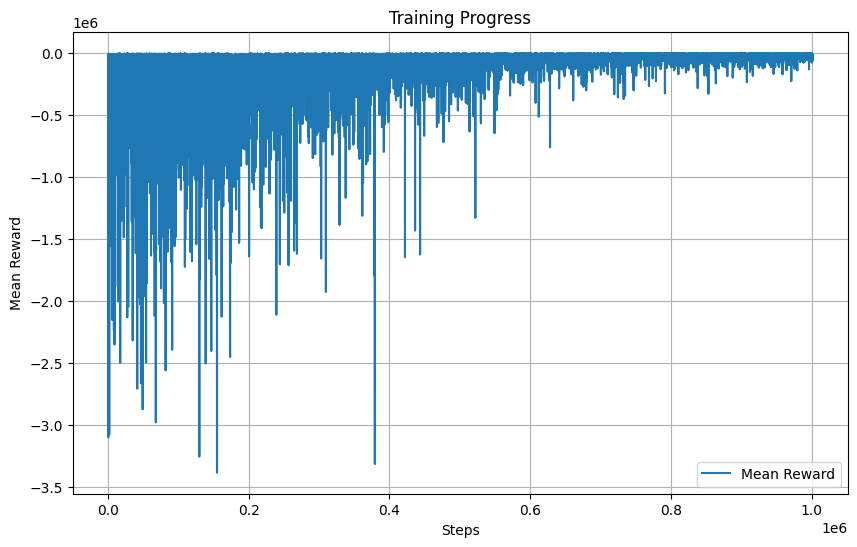

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 78.7         |
|    ep_rew_mean          | -1.69e+04    |
| time/                   |              |
|    fps                  | 975          |
|    iterations           | 489          |
|    time_elapsed         | 1026         |
|    total_timesteps      | 1001472      |
| train/                  |              |
|    approx_kl            | 0.0022051476 |
|    clip_fraction        | 0.0118       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.19        |
|    explained_variance   | -0.000373    |
|    learning_rate        | 0.0001       |
|    loss                 | 4.56e+05     |
|    n_updates            | 4880         |
|    policy_gradient_loss | -0.00485     |
|    std                  | 0.724        |
|    value_loss           | 5.75e+06     |
------------------------------------------


In [ ]:
'''
env = QuadraticEnvND(functions = training_functions, n_dims = 2)
model_ppo.set_env(env = env)
callback = environments.JupyterNotebookPlotCallback()
model_ppo.learn(total_timesteps=1e6, callback=callback)
'''

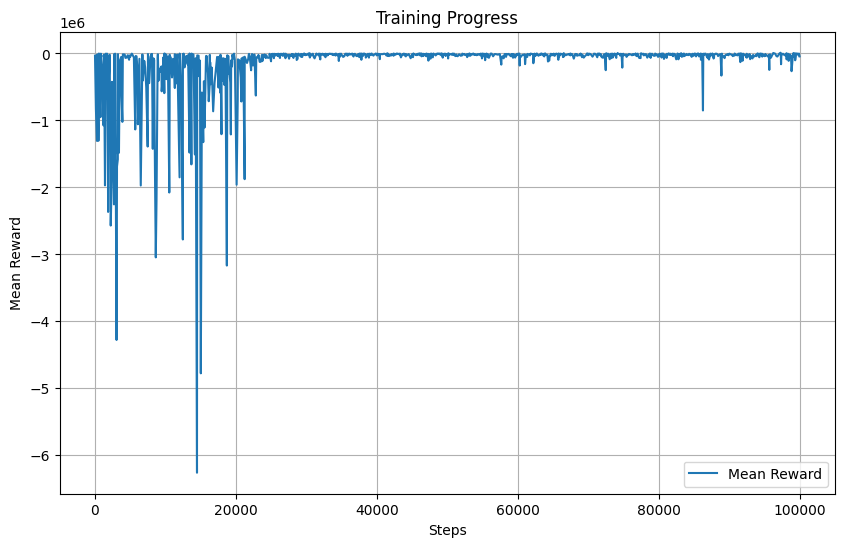

In [ ]:
'''
env = QuadraticEnvND(functions = training_functions, n_dims = 2)
model_sac.set_env(env = env)
callback_sac = environments.JupyterNotebookPlotCallback()
model_sac.learn(total_timesteps=100000, callback=callback_sac)
'''

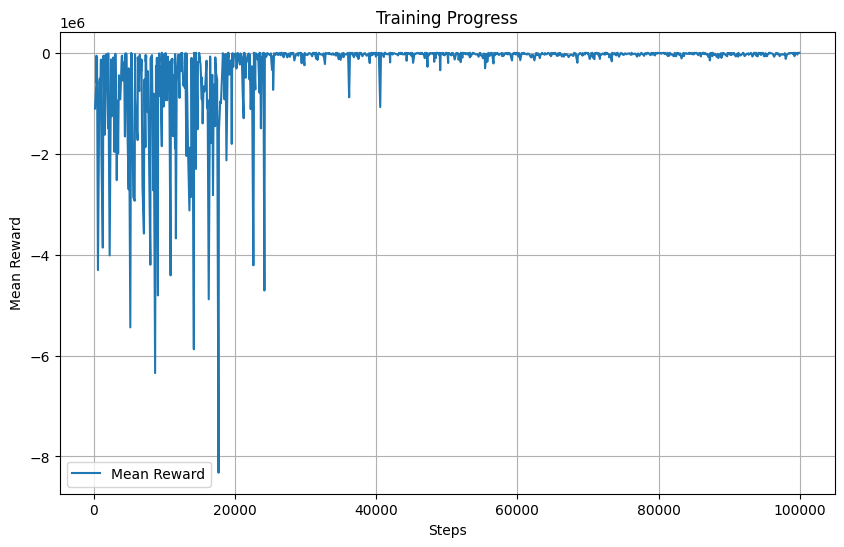

In [ ]:
'''
env = QuadraticEnvND(functions = training_functions, n_dims = 2)
model_ddpg.set_env(env = env)
callback_ddpg = environments.JupyterNotebookPlotCallback()
model_ddpg.learn(total_timesteps=100000, callback=callback_ddpg)
'''

In [3]:
testing_functions = data.generate_dataset(n = 10, function_type = 'quadratic_function_nd', n_dims = 2)
test_env = QuadraticEnvND(functions = testing_functions, n_dims = 2)

In [4]:
model_sac.set_env(env=test_env)
model_ppo.set_env(env=test_env)
model_ddpg.set_env(env=test_env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/I761836/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [5]:
'''
model_sac.save('sac_quadratic_function2D')
model_ppo.save('ppo_quadratic_function2D')
model_ddpg.save('ddpg_quadratic_function2D')
'''

"\nmodel_sac.save('sac_quadratic_function2D')\nmodel_ppo.save('ppo_quadratic_function2D')\nmodel_ddpg.save('ddpg_quadratic_function2D')\n"

/Users/I761836/Downloads/L2O/testing.py:89: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  return x.T @ A @ x + b.T @ x + c


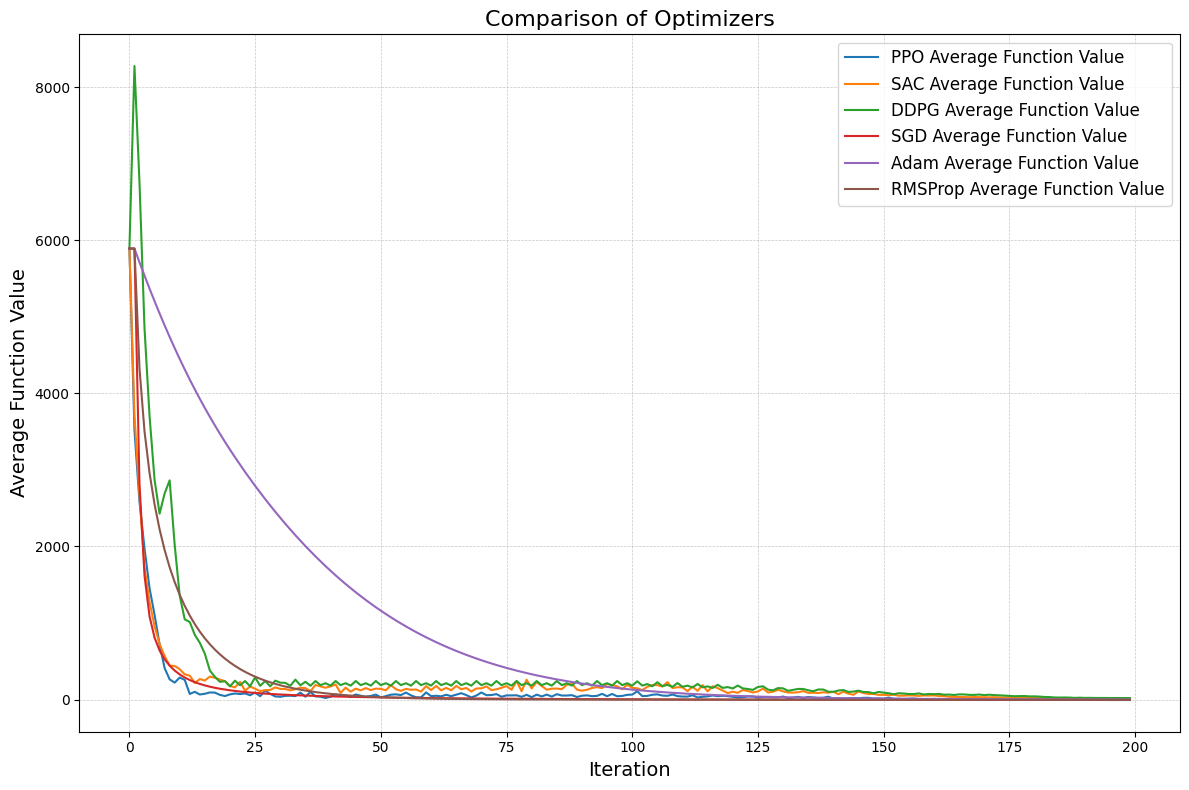

In [6]:
models = {
        'PPO': model_ppo,
        'SAC': model_sac,
        'DDPG': model_ddpg,
        'SGD': None,
        'Adam': None,
        'RMSProp': None,
    }
max_iterations = 200
results = testing.run_optimizer_tests(test_env, testing_functions, models, max_iterations = 200, function_type = 'quadratic_function_nd')
avg_values = testing.calculate_average_values(results)
testing.plot_results(avg_values, max_iterations)

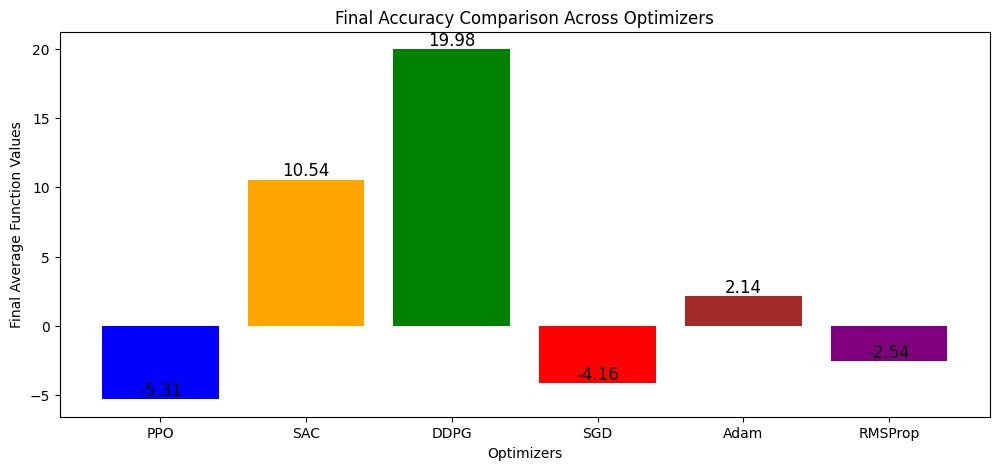

In [7]:
comparison = []
for model_name, data in avg_values.items():
    comparison.append((model_name, data.min()))
testing.plot_final_function_values(comparison)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_function(x, A, b, c):
    """Computes the quadratic function f(x) = x^T A x + b^T x + c."""
    return x.T @ A @ x + b.T @ x + c

def plot_quadratic_contour_subplot(ax, A, b, c, trajectory, title):
    """Generates a subplot of a quadratic function with a trajectory overlay."""
    x1_min, x1_max = -10, 10
    x2_min, x2_max = -10, 10
    
    x1_range = np.linspace(x1_min, x1_max, 100)
    x2_range = np.linspace(x2_min, x2_max, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Z = np.array([[quadratic_function(np.array([x1, x2]), A, b, c) for x1, x2 in zip(x1_row, x2_row)] for x1_row, x2_row in zip(X1, X2)])
    
    contour = ax.contourf(X1, X2, Z, levels=20, cmap="viridis")
    ax.plot(trajectory[:, 0], trajectory[:, 1], 'r-o', markersize=3, linewidth=1, label="Trajectory")
    ax.scatter(trajectory[0, 0], trajectory[0, 1], color='green', s=100, label="Start Position", edgecolors='black')
    ax.scatter(trajectory[-1, 0], trajectory[-1, 1], color='blue', s=100, label="End Position", edgecolors='black')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_title(f'{title} Optimization Trajectory')
    ax.legend()

def plot_multiple_quadratic_contours(testing_function, results, number_of_iterations = 200):
    """Plots multiple quadratic contours as subplots."""
    methods = ['PPO', 'SAC', 'DDPG', 'SGD', 'Adam', 'RMSProp']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for ax, method in zip(axes.flat, methods):
        if number_of_iterations < 100:
            plot_quadratic_contour_subplot(ax, *testing_function, results[method]['positions'][:number_of_iterations], method)
        else:
            plot_quadratic_contour_subplot(ax, *testing_function, results[method]['positions'][:number_of_iterations], method)
    plt.show()

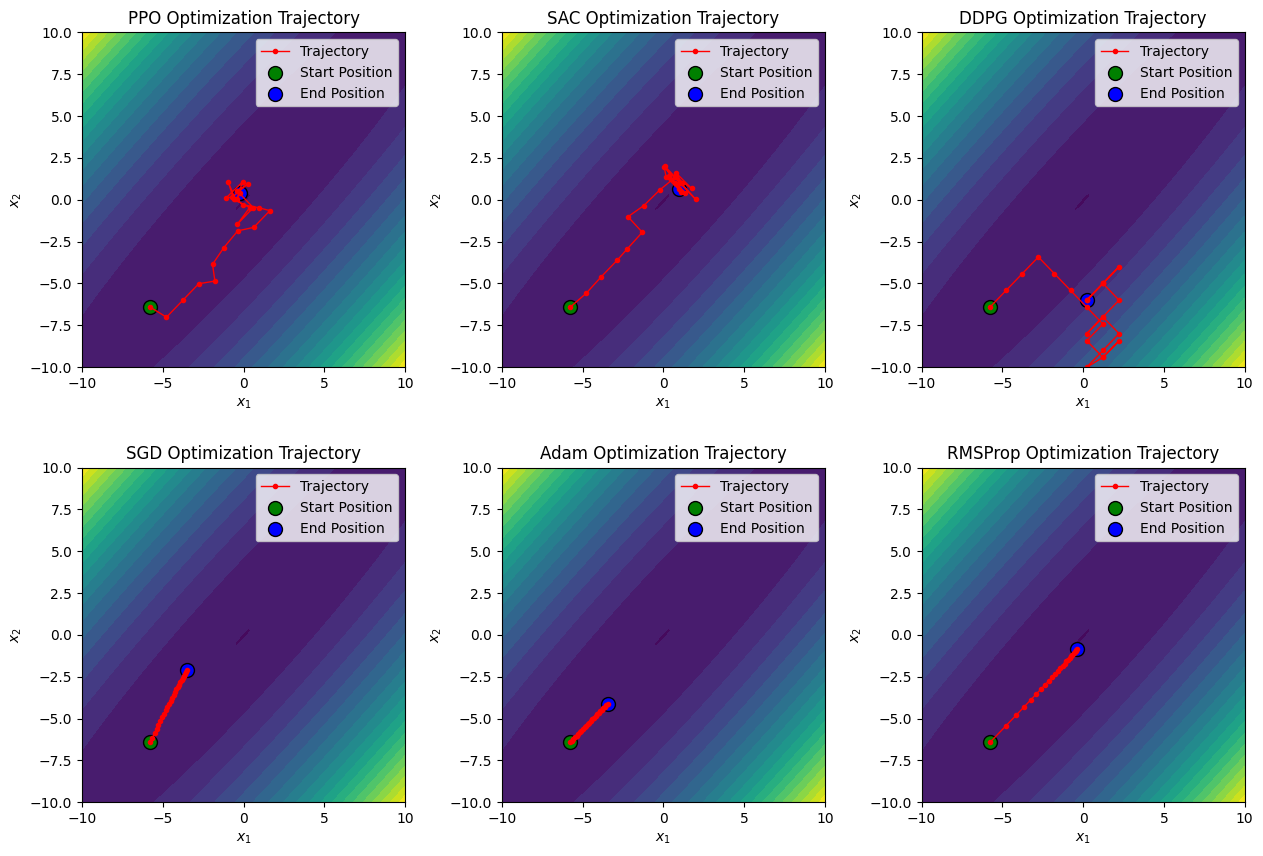

In [20]:
plot_multiple_quadratic_contours(testing_functions[0], results, 25)

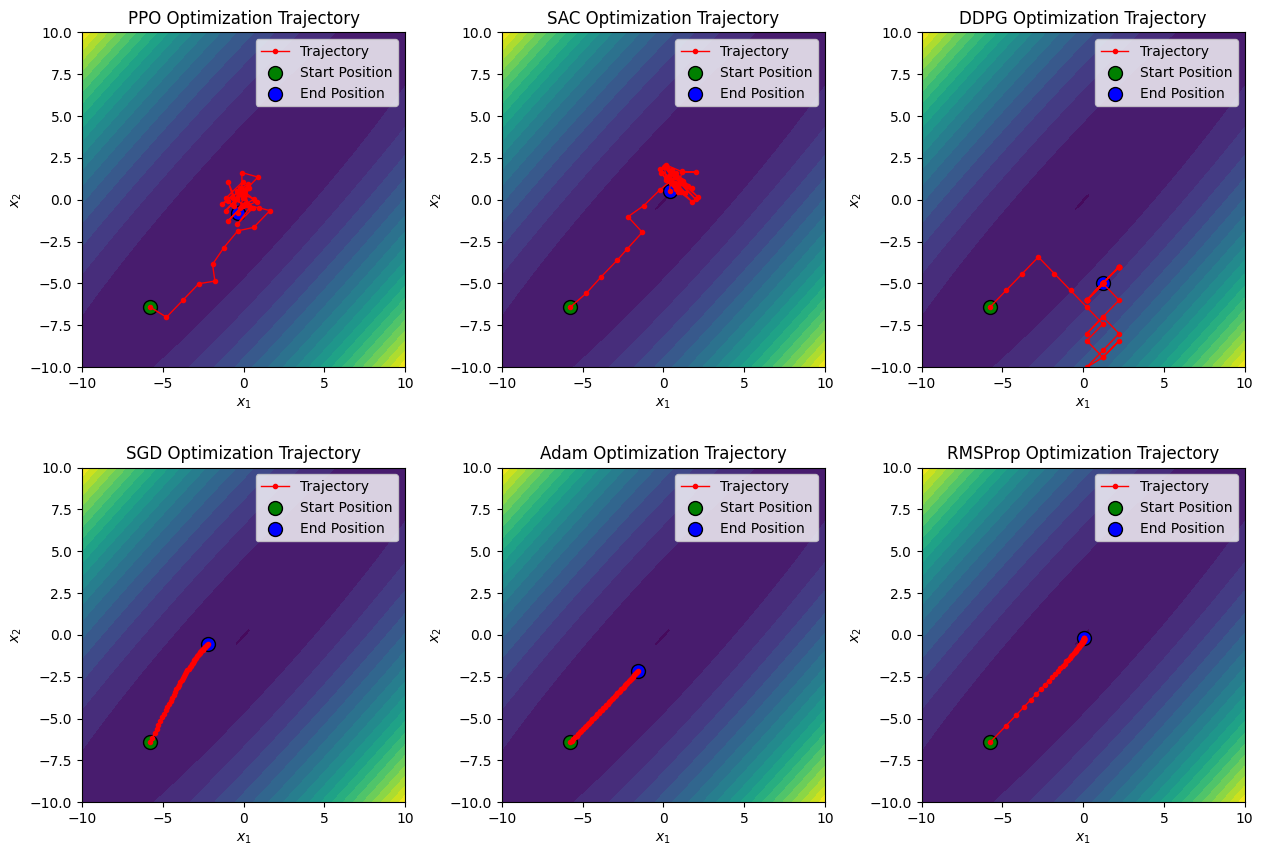

In [21]:
plot_multiple_quadratic_contours(testing_functions[0], results, 50)

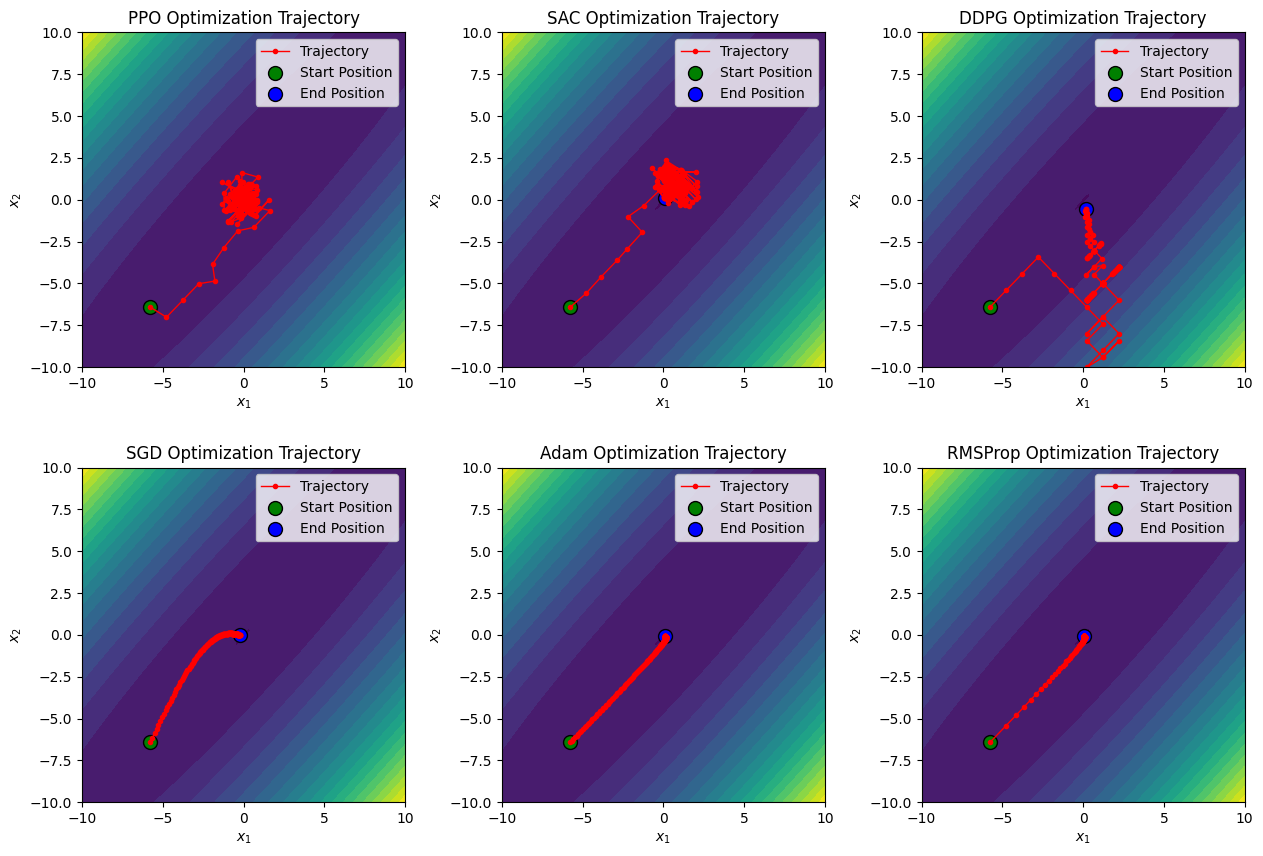

In [22]:
plot_multiple_quadratic_contours(testing_functions[0], results)